In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [45]:
# Create dataset
X, y = make_circles(n_samples=1000, noise=0.03, factor=0.5, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Convert to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).unsqueeze(1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test).unsqueeze(1)

# Setup device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Move to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

print(f"Training size: {len(X_train)}")
print(f"Test size: {len(X_test)}")


Using device: cpu
Training size: 800
Test size: 200


In [46]:
print("\n" + "=" * 60)
print("Part 2: Define the Model")
print("=" * 60)

# Define linear model
class CircleModelV0(nn.Module):
    def __init__(self):
        super(CircleModelV0, self).__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(2, 8),
            nn.Linear(8, 1)
        )

    def forward(self, x):
        return self.layer_stack(x)

model = CircleModelV0().to(device)
print(model)


Part 2: Define the Model
CircleModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=1, bias=True)
  )
)


In [47]:
print("\n" + "=" * 60)
print("Part 3: Loss Function and Optimizer")
print("=" * 60)

#Loss function for binary classification
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"Loss function: BCEWithLogitsLoss()")
print(f"Optimizer: Adam (lr=0.01)")


Part 3: Loss Function and Optimizer
Loss function: BCEWithLogitsLoss()
Optimizer: Adam (lr=0.01)


In [48]:
print("\n" + "=" * 60)
print("Part 4: Training Loop")
print("=" * 60)

epochs = 100
train_losses = []
train_accuracies = []

model.train()
for epoch in range(epochs):
    # Step 1: Forward pass
    y_logits = model(X_train)

    # Step 2: Calculate loss
    loss = criterion(y_logits, y_train)

    # Step 3: Zero gradients
    optimizer.zero_grad()

    # Step 4: Backward pass
    loss.backward()

    # Step 5: Optimizer step
    optimizer.step()

    train_losses.append(loss.item())

    with torch.no_grad():
        y_pred = (torch.sigmoid(y_logits) > 0.5).long()
        accuracy = (y_pred == y_train).float().mean()
        train_accuracies.append(accuracy.item())
    #print progress
    if epoch % 10 == 0:
        print(f"Epoch: [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item()*100:.2f}%")

print("\nTraining complete!")


Part 4: Training Loop
Epoch: [1/100], Loss: 0.7036, Accuracy: 44.37%
Epoch: [11/100], Loss: 0.6935, Accuracy: 64.00%
Epoch: [21/100], Loss: 0.6932, Accuracy: 49.38%
Epoch: [31/100], Loss: 0.6931, Accuracy: 51.63%
Epoch: [41/100], Loss: 0.6929, Accuracy: 51.50%
Epoch: [51/100], Loss: 0.6929, Accuracy: 50.88%
Epoch: [61/100], Loss: 0.6929, Accuracy: 51.75%
Epoch: [71/100], Loss: 0.6929, Accuracy: 51.00%
Epoch: [81/100], Loss: 0.6929, Accuracy: 51.50%
Epoch: [91/100], Loss: 0.6929, Accuracy: 51.38%

Training complete!



Part 5: Visualizing Training Progress


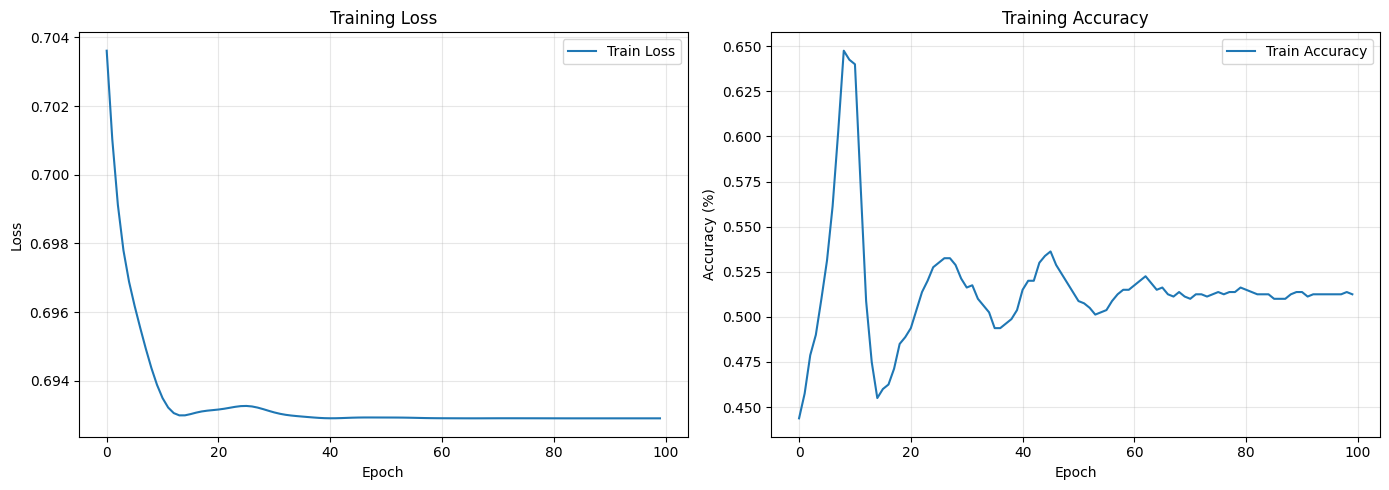

Training curves visualized!
Motto: Visualize, visualize, visualize!


In [49]:
print("\n" + "=" * 60)
print("Part 5: Visualizing Training Progress")
print("=" * 60)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].plot(train_losses, label='Train Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy curve
axes[1].plot(train_accuracies, label='Train Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Training Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Training curves visualized!")
print("Motto: Visualize, visualize, visualize!")


In [50]:
print("\n" + "=" * 60)
print("Part 6: Inference Mode Predictions")
print("=" * 60)

# Set model to evaluation mode
model.eval()

# Make predictions using inference mode
with torch.inference_mode():
    # Forward pass (raw logits)
    test_logits = model(X_test)

    # Convert to probabilities
    test_probs = torch.sigmoid(test_logits)

    # Convert to labels
    test_preds = (test_probs > 0.5).long()

# Calculate test accuracy
test_accuracy = (test_preds == y_test).float().mean()
print(f"Test Accuracy: {test_accuracy.item()*100:.2f}%")

# Show some examples
print("\nFirst 5 predictions:")
for i in range(5):
    print(f"  Sample {i+1}:")
    print(f"    Logits: {test_logits[i].item():.4f}")
    print(f"    Probability: {test_probs[i].item():.4f}")
    print(f"    Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")



Part 6: Inference Mode Predictions
Test Accuracy: 46.50%

First 5 predictions:
  Sample 1:
    Logits: 0.0257
    Probability: 0.5064
    Predicted: 1, Actual: 1.0
  Sample 2:
    Logits: 0.0713
    Probability: 0.5178
    Predicted: 1, Actual: 0.0
  Sample 3:
    Logits: -0.0242
    Probability: 0.4939
    Predicted: 0, Actual: 1.0
  Sample 4:
    Logits: 0.0640
    Probability: 0.5160
    Predicted: 1, Actual: 0.0
  Sample 5:
    Logits: -0.0286
    Probability: 0.4928
    Predicted: 0, Actual: 1.0


In [51]:
print("\n" + "=" * 60)
print("Part 7: Understanding Evaluation Mode")
print("=" * 60)

print("model.eval() vs model.train():")
print("  model.train() - Enables dropout and batch norm training behavior")
print("  model.eval()  - Disables dropout, uses running statistics")

print("\ntorch.inference_mode():")
print("  - Disables gradient calculation")
print("  - Faster than torch.no_grad()")
print("  - Use for making predictions")

print("\nCorrect inference pattern:")
print("  model.eval()")
print("  with torch.inference_mode():")
print("      predictions = model(X)")



Part 7: Understanding Evaluation Mode
model.eval() vs model.train():
  model.train() - Enables dropout and batch norm training behavior
  model.eval()  - Disables dropout, uses running statistics

torch.inference_mode():
  - Disables gradient calculation
  - Faster than torch.no_grad()
  - Use for making predictions

Correct inference pattern:
  model.eval()
  with torch.inference_mode():
      predictions = model(X)



Part 8: Visualizing Predictions


/tmp/ipython-input-1621404844.py:21: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_cpu[incorrect_mask, 0], X_test_cpu[incorrect_mask, 1],


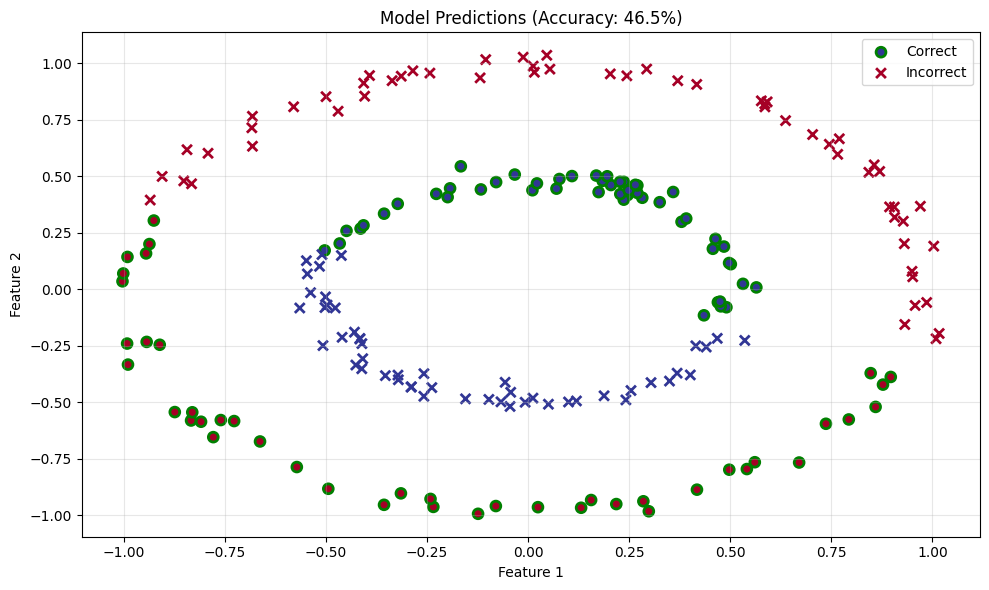

In [52]:
print("\n" + "=" * 60)
print("Part 8: Visualizing Predictions")
print("=" * 60)

# Move data to CPU for plotting
X_test_cpu = X_test.cpu().numpy()
y_test_cpu = y_test.cpu().numpy().squeeze()
test_preds_cpu = test_preds.cpu().numpy().squeeze()

# Plot predictions
plt.figure(figsize=(10, 6))

# Correct predictions (green circles)
correct_mask = test_preds_cpu == y_test_cpu
plt.scatter(X_test_cpu[correct_mask, 0], X_test_cpu[correct_mask, 1],
            c=y_test_cpu[correct_mask], cmap='RdYlBu', s=50,
            marker='o', edgecolors='g', linewidths=2, label='Correct')

# Incorrect predictions (red X)
incorrect_mask = ~correct_mask
plt.scatter(X_test_cpu[incorrect_mask, 0], X_test_cpu[incorrect_mask, 1],
            c=y_test_cpu[incorrect_mask], cmap='RdYlBu', s=50,
            marker='x', edgecolors='r', linewidths=2, label='Incorrect')

plt.title(f'Model Predictions (Accuracy: {test_accuracy.item()*100:.1f}%)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()



Exercises

Exercise 1: Try different thresholds
Experiment with different decision thresholds:
  - threshold=0.3 (more sensitive to class 1)
  - threshold=0.5 (default)
  - threshold=0.7 (less sensitive to class 1)

Threshold: 0.3
Test Accuracy: 50.00%

Threshold: 0.5
Test Accuracy: 46.50%

Threshold: 0.7
Test Accuracy: 50.00%

First 5 predictions:
  Sample 1:
    Logits: 0.0257
    Probability: 0.5064
    Predicted: 0, Actual: 1.0
  Sample 2:
    Logits: 0.0713
    Probability: 0.5178
    Predicted: 0, Actual: 0.0
  Sample 3:
    Logits: -0.0242
    Probability: 0.4939
    Predicted: 0, Actual: 1.0
  Sample 4:
    Logits: 0.0640
    Probability: 0.5160
    Predicted: 0, Actual: 0.0
  Sample 5:
    Logits: -0.0286
    Probability: 0.4928
    Predicted: 0, Actual: 1.0


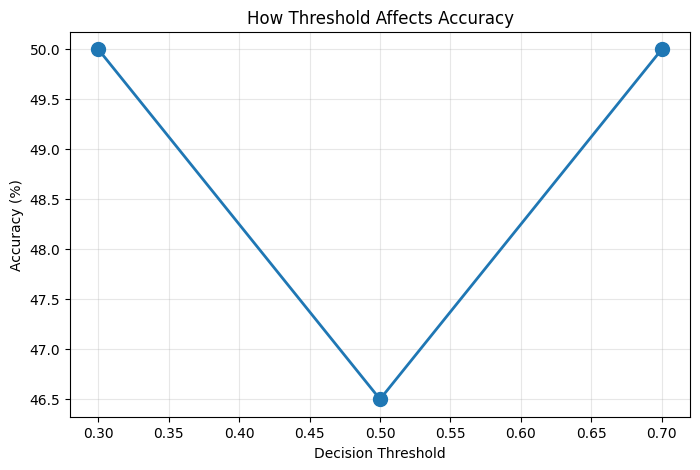

Tip: Modify (test_probs > 0.5) to use different thresholds


In [53]:
print("\n" + "=" * 60)
print("Exercises")
print("=" * 60)

# Exercise 1: Try different thresholds
print("\nExercise 1: Try different thresholds")
print("Experiment with different decision thresholds:")
print("  - threshold=0.3 (more sensitive to class 1)")
print("  - threshold=0.5 (default)")
print("  - threshold=0.7 (less sensitive to class 1)")

# Set model to evaluation mode
model.eval()
results = {}
for threshold in [0.3, 0.5, 0.7]:
    print(f"\nThreshold: {threshold}")
    # Make predictions using inference mode
    with torch.inference_mode():
        # Forward pass (raw logits)
        test_logits = model(X_test)

        # Convert to probabilities
        test_probs = torch.sigmoid(test_logits)

        # Convert to labels
        test_preds = (test_probs > threshold).long()

        # Calculate test accuracy
        test_accuracy = (test_preds == y_test).float().mean()
        print(f"Test Accuracy: {test_accuracy.item()*100:.2f}%")
        results[threshold] = test_accuracy.item()

# Show some examples
print("\nFirst 5 predictions:")
for i in range(5):
    print(f"  Sample {i+1}:")
    print(f"    Logits: {test_logits[i].item():.4f}")
    print(f"    Probability: {test_probs[i].item():.4f}")
    print(f"    Predicted: {test_preds[i].item()}, Actual: {y_test[i].item()}")

#visualize
plt.figure(figsize=(8, 5))
thresholds_list = list(results.keys())
accuracies_list = [results[t]*100 for t in thresholds_list]
plt.plot(thresholds_list, accuracies_list, marker='o', linewidth=2, markersize=10)
plt.xlabel('Decision Threshold')
plt.ylabel('Accuracy (%)')
plt.title('How Threshold Affects Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

print("Tip: Modify (test_probs > 0.5) to use different thresholds")



Exercise 2: Experiment with learning rate
Try different learning rates:
  - lr=0.001 (slower learning)
  - lr=0.01 (default)
  - lr=0.1 (faster learning, may be unstable)
Epoch [10/100], Loss: 0.7039, Acc: 50.00%
Epoch [20/100], Loss: 0.7003, Acc: 50.00%
Epoch [30/100], Loss: 0.6976, Acc: 50.00%
Epoch [40/100], Loss: 0.6956, Acc: 50.00%
Epoch [50/100], Loss: 0.6944, Acc: 50.00%
Epoch [60/100], Loss: 0.6936, Acc: 39.38%
Epoch [70/100], Loss: 0.6932, Acc: 35.25%
Epoch [80/100], Loss: 0.6930, Acc: 44.87%
Epoch [90/100], Loss: 0.6929, Acc: 48.25%
Epoch [100/100], Loss: 0.6929, Acc: 49.88%
Epoch [10/100], Loss: 0.6974, Acc: 47.25%
Epoch [20/100], Loss: 0.6931, Acc: 49.75%
Epoch [30/100], Loss: 0.6930, Acc: 52.25%
Epoch [40/100], Loss: 0.6930, Acc: 52.75%
Epoch [50/100], Loss: 0.6930, Acc: 51.75%
Epoch [60/100], Loss: 0.6929, Acc: 51.88%
Epoch [70/100], Loss: 0.6929, Acc: 51.63%
Epoch [80/100], Loss: 0.6929, Acc: 51.75%
Epoch [90/100], Loss: 0.6929, Acc: 51.50%
Epoch [100/100], Loss: 0.6929

/tmp/ipython-input-866763173.py:66: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend()
/tmp/ipython-input-866763173.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


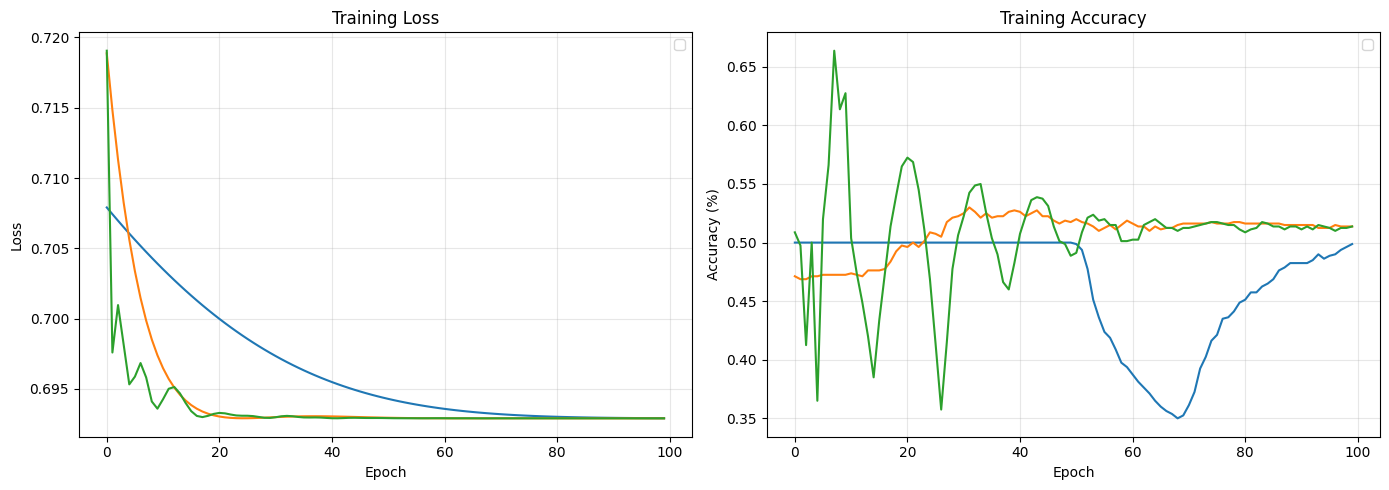

Training curves visualized!
Tip: Modify the 'lr' parameter in optim.Adam()


In [54]:
# Exercise 2: Experiment with learning rate
print("\nExercise 2: Experiment with learning rate")
print("Try different learning rates:")
print("  - lr=0.001 (slower learning)")
print("  - lr=0.01 (default)")
print("  - lr=0.1 (faster learning, may be unstable)")
LEARNING_RATES = [0.001, 0.01, 0.1]

epochs = 100
results = {}

for lr in LEARNING_RATES:

    train_losses = []
    train_accuracies = []

    model = CircleModelV0().to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()

    for epoch in range(epochs):
        # Step 1: Forward pass
        y_logits = model(X_train)

        # Step 2: Calculate loss
        loss = criterion(y_logits, y_train)

        # Step 3: Zero gradients
        optimizer.zero_grad()

        # Step 4: Backward pass
        loss.backward()

        # Step 5: Optimizer step
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())

        with torch.no_grad():
            y_pred = (torch.sigmoid(y_logits) > 0.5).long()
            accuracy = (y_pred == y_train).float().mean()

            train_accuracies.append(accuracy.item())

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

    results[lr] = {
        "loss": train_losses.copy(),
        "accuracy": train_accuracies.copy(),
    }

print("\nTraining complete!")

#Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss curve
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy curve
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Training Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Loop to plot each learning rate's data
for lr in LEARNING_RATES:
    axes[0].plot(results[lr]["loss"], label=f'LR={lr}')
    axes[1].plot(results[lr]["accuracy"], label=f'LR={lr}')

plt.tight_layout()
plt.show()

print("Training curves visualized!")

print("Tip: Modify the 'lr' parameter in optim.Adam()")


Exercise 3: Analyze training curves
Questions to answer:

 Analyzing learning rate:0.01
  - Is the loss decreasing steadily?
Early loss: 0.7059
Late loss: 0.6929
Loss decreasing: 1.8%
  - Is the training plateauing?
Plateau change: 0.0
Status: Plateau - loss is barely changing 0.0000

Visualizing last 20 epochs trend...


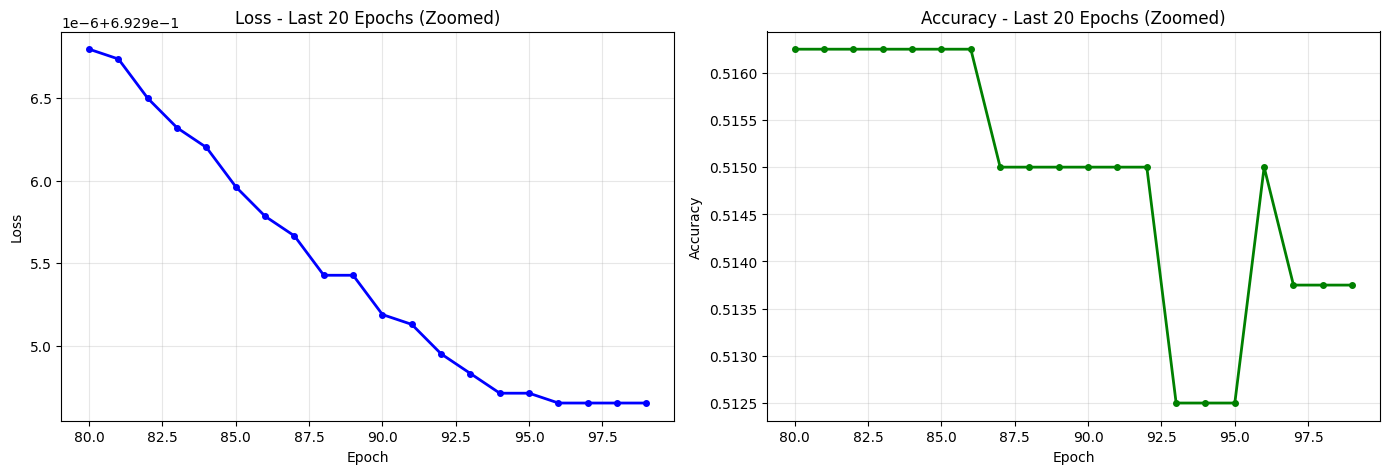

 
 - Would more epochs help?
-> PREDICTION: Training appears plateaued, more epochs UNLIKELY to help much
  Loss change: 0.000000
  Accuracy change: -0.000250
Tip: Look at the loss and accuracy curves


In [55]:
# Exercise 3: Track loss over epochs
print("\nExercise 3: Analyze training curves")
print("Questions to answer:")

train_losses = results[0.01]['loss']
train_accuracy = results[0.01]['accuracy']
print(f"\n Analyzing learning rate:0.01")

print("  - Is the loss decreasing steadily?")
early_loss = train_losses[:10]
late_loss = train_losses[-10:]

early_avg = sum(early_loss)/len(early_loss)
late_avg = sum(late_loss)/len(late_loss)

print(f"Early loss: {early_avg:.4f}")
print(f"Late loss: {late_avg:.4f}")

improvement = ((early_avg - late_avg) /(early_avg) *100)
print(f"Loss decreasing: {improvement:.1f}%")

print("  - Is the training plateauing?")
last_20 = train_losses[-20:]
first_half = last_20[:10]
second_half = last_20[10:]

first_avg = sum(first_half)/len(first_half)
second_avg = sum(second_half)/len(second_half)

plateau_change = first_avg - second_avg
print(f"Plateau change: {plateau_change:.1f}")

if plateau_change < 0.001:
    print(f"Status: Plateau - loss is barely changing {plateau_change:.4f}")
else:
    print(f"Status: still improving {plateau_change:.4f}")

#Visualize last 20 epochs trend
print("\nVisualizing last 20 epochs trend...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Last 20 epochs
last_20_epochs = range(len(train_losses)-20, len(train_losses))
last_20_losses = train_losses[-20:]
last_20_accs = train_accuracy[-20:]
# Loss trend
axes[0].plot(last_20_epochs, last_20_losses, marker='o', linewidth=2, markersize=4, color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss - Last 20 Epochs (Zoomed)')
axes[0].grid(True, alpha=0.3)

# Accuracy trend
axes[1].plot(last_20_epochs, last_20_accs, marker='o', linewidth=2, markersize=4, color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy - Last 20 Epochs (Zoomed)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(" \n - Would more epochs help?")

last_10_losses = train_losses[-10:]
last_10_acc = train_accuracy[-10:]

# Compare
first_5_loss = sum(last_10_losses[:5]) / 5
last_5_loss = sum(last_10_losses[5:]) / 5

first_5_acc = sum(last_10_acc[:5]) / 5
last_5_acc = sum(last_10_acc[5:]) / 5

# Calculate changes
loss_change = first_5_loss - last_5_loss
acc_change = last_5_acc - first_5_acc

if loss_change < 0.001 and acc_change < 0.001:
    print("-> PREDICTION: Training appears plateaued, more epochs UNLIKELY to help much")
else:
    print("-> PREDICTION: Still improving, more epochs MIGHT help!")
print(f"  Loss change: {loss_change:.6f}")
print(f"  Accuracy change: {acc_change:.6f}")

print("Tip: Look at the loss and accuracy curves")



Exercise 4: Experiment with epochs
Try different numbers of epochs:
  - epochs=50 (less training)
  - epochs=100 (default)
  - epochs=200 (more training)

Exercise 4: Experiment with epochs
Try different numbers of epochs:
  - epochs=50 (less training)
  - epochs=100 (default)
  - epochs=200 (more training)

Training with 50 epochs...
Epoch [10/50], Loss: 0.6972, Acc: 48.12%
Epoch [20/50], Loss: 0.6938, Acc: 50.00%
Epoch [30/50], Loss: 0.6932, Acc: 58.75%
Epoch [40/50], Loss: 0.6930, Acc: 51.25%
Epoch [50/50], Loss: 0.6930, Acc: 48.50%
Final Test Accuracy: 44.00%

Training with 100 epochs...
Epoch [20/100], Loss: 0.6931, Acc: 48.63%
Epoch [40/100], Loss: 0.6929, Acc: 51.50%
Epoch [60/100], Loss: 0.6929, Acc: 51.50%
Epoch [80/100], Loss: 0.6929, Acc: 51.25%
Epoch [100/100], Loss: 0.6929, Acc: 51.38%
Final Test Accuracy: 46.50%

Training with 200 epochs...
Epoch [40/200], Loss: 0.6930, Acc: 54.75%
Epoch [80/200], Loss: 0.6929, Acc: 52.00%
Epoch [120/200], Loss: 0.6929, Acc: 51.25%
Epoch

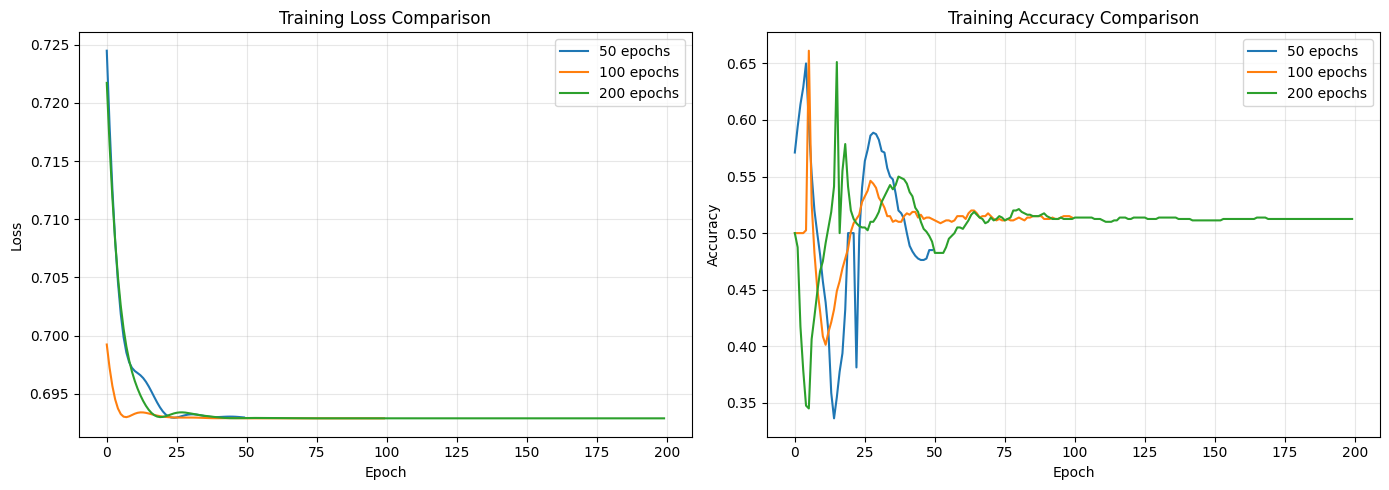

Tip: Modify the 'epochs' variable


In [56]:
# Exercise 4: Experiment with epochs
print("\nExercise 4: Experiment with epochs")
print("Try different numbers of epochs:")
print("  - epochs=50 (less training)")
print("  - epochs=100 (default)")
print("  - epochs=200 (more training)")

# Exercise 4: Experiment with epochs
print("\nExercise 4: Experiment with epochs")
print("Try different numbers of epochs:")
print("  - epochs=50 (less training)")
print("  - epochs=100 (default)")
print("  - epochs=200 (more training)")

# Define different epoch counts to test
EPOCH_COUNTS = [50, 100, 200]
lr = 0.01  # Use default learning rate

results_epochs = {}

for num_epochs in EPOCH_COUNTS:
    print(f"\n{'='*40}")
    print(f"Training with {num_epochs} epochs...")
    print('='*40)

    # Initialize fresh model, loss, and optimizer
    model = CircleModelV0().to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    train_accuracies = []

    model.train()

    for epoch in range(num_epochs):
        # Step 1: Forward pass
        y_logits = model(X_train)

        # Step 2: Calculate loss
        loss = criterion(y_logits, y_train)

        # Step 3: Zero gradients
        optimizer.zero_grad()

        # Step 4: Backward pass
        loss.backward()

        # Step 5: Optimizer step
        optimizer.step()

        # Track metrics
        train_losses.append(loss.item())

        with torch.no_grad():
            y_pred = (torch.sigmoid(y_logits) > 0.5).long()
            accuracy = (y_pred == y_train).float().mean()
            train_accuracies.append(accuracy.item())

        # Print progress (every 20% of total epochs)
        print_interval = max(1, num_epochs // 5)
        if (epoch + 1) % print_interval == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item()*100:.2f}%')

    # Evaluate on test set
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs > 0.5).long()
        test_accuracy = (test_preds == y_test).float().mean()

    print(f"Final Test Accuracy: {test_accuracy.item()*100:.2f}%")

    # Store results
    results_epochs[num_epochs] = {
        'loss': train_losses.copy(),
        'accuracy': train_accuracies.copy(),
        'final_test_acc': test_accuracy.item()
    }

print("\n" + "="*40)
print("Training complete for all epoch counts!")
print("="*40)

# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss curves
for num_epochs in EPOCH_COUNTS:
    axes[0].plot(results_epochs[num_epochs]['loss'], label=f'{num_epochs} epochs')

axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot accuracy curves
for num_epochs in EPOCH_COUNTS:
    axes[1].plot(results_epochs[num_epochs]['accuracy'], label=f'{num_epochs} epochs')

axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Training Accuracy Comparison')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Tip: Modify the 'epochs' variable")

In [57]:
# Exercise 5: Compare model.eval() vs not using it
print("\nExercise 5: Understand model.eval()")
print("Question: What happens if you forget to call model.eval() before testing?")

# Train a fresh model for this experiment

model = CircleModelV0().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100
model.train()

for epoch in range(epochs):
    # Forward pass
    y_logits = model(X_train)
    loss = criterion(y_logits, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print every 25 epochs
    if (epoch + 1) % 25 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

print("Training complete!\n")


model.eval()  # Set to evaluation mode

predictions_with_eval = []
accuracies_with_eval = []

# Run predictions 5 times to check consistency
for run in range(5):
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs > 0.5).long()
        test_accuracy = (test_preds == y_test).float().mean()

        predictions_with_eval.append(test_preds.cpu().numpy())
        accuracies_with_eval.append(test_accuracy.item())

        print(f"Run {run+1}: Test Accuracy = {test_accuracy.item()*100:.2f}%")

print("\n" + "="*40)
print("Test 2: WITHOUT model.eval() (INCORRECT)")
print("="*40)

model.train()  # Keep in training mode

predictions_without_eval = []
accuracies_without_eval = []

# Run predictions 5 times to check consistency
for run in range(5):
    with torch.inference_mode():
        test_logits = model(X_test)
        test_probs = torch.sigmoid(test_logits)
        test_preds = (test_probs > 0.5).long()
        test_accuracy = (test_preds == y_test).float().mean()

        predictions_without_eval.append(test_preds.cpu().numpy())
        accuracies_without_eval.append(test_accuracy.item())

        print(f"Run {run+1}: Test Accuracy = {test_accuracy.item()*100:.2f}%")

print("\nWhat model.eval() does:")
print("  1. Disables Dropout layers (sets them to pass-through mode)")
print("  2. Sets BatchNorm to use running statistics (instead of batch statistics)")
print("  3. Ensures consistent, deterministic predictions")

print("\nWhat happens WITHOUT model.eval():")
print("  - For THIS model: No difference (no Dropout/BatchNorm layers)")
print("  - For models WITH Dropout: Random neuron dropping = inconsistent predictions!")
print("  - For models WITH BatchNorm: Uses current batch statistics = varying results")

print("\nFor OUR CircleModelV0:")
print("  - Only has Linear layers (no Dropout, no BatchNorm)")
print("  - Results are IDENTICAL with or without model.eval()")
print("  - BUT still use model.eval() as BEST PRACTICE!")

print("\nTip: Try commenting out model.eval() and see if results change")


Exercise 5: Understand model.eval()
Question: What happens if you forget to call model.eval() before testing?
Epoch [25/100], Loss: 0.6944
Epoch [50/100], Loss: 0.6930
Epoch [75/100], Loss: 0.6929
Epoch [100/100], Loss: 0.6929
Training complete!

Run 1: Test Accuracy = 46.50%
Run 2: Test Accuracy = 46.50%
Run 3: Test Accuracy = 46.50%
Run 4: Test Accuracy = 46.50%
Run 5: Test Accuracy = 46.50%

Test 2: WITHOUT model.eval() (INCORRECT)
Run 1: Test Accuracy = 46.50%
Run 2: Test Accuracy = 46.50%
Run 3: Test Accuracy = 46.50%
Run 4: Test Accuracy = 46.50%
Run 5: Test Accuracy = 46.50%

What model.eval() does:
  1. Disables Dropout layers (sets them to pass-through mode)
  2. Sets BatchNorm to use running statistics (instead of batch statistics)
  3. Ensures consistent, deterministic predictions

What happens WITHOUT model.eval():
  - For THIS model: No difference (no Dropout/BatchNorm layers)
  - For models WITH Dropout: Random neuron dropping = inconsistent predictions!
  - For models W